# Objectives For Data Analysis: 
- Analyze GPA trends over multiple academic quarters (Fall 2021 to Winter 2025) to identify any obvious patterns, peaks, or declines in GPA for both CS specific and non CS courses.

- Create linear regression models for the overall trends in CS and overall GPA over time that highlight long-term patterns and can also predict average GPAs for the next few quarters. 

- Create linear regression models for the relationship between the number of units taken (both CS specific and non CS) that can determine and predict the impact of course load on student performance.

- Examine the distribution of GPAs across quarters and years using box plots and bar graphs to identify outliers, medians, and the variations of student performance across different quarters and over the spans of 5 years.

In [477]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [478]:
df = pd.read_excel('fake_student_records.xlsx')

df.head()

,StudentID,Q1_Timestamp,Q1_CS_GPA,Q1_Overall_GPA,Q1_CS_Units,Q1_Total_Units,Q2_Timestamp,Q2_CS_GPA,Q2_Overall_GPA,Q2_CS_Units,Q2_Total_Units,Q3_Timestamp,Q3_CS_GPA,Q3_Overall_GPA,Q3_CS_Units,Q3_Total_Units,Q4_Timestamp,Q4_CS_GPA,Q4_Overall_GPA,Q4_CS_Units,Q4_Total_Units,Q5_Timestamp,Q5_CS_GPA,Q5_Overall_GPA,Q5_CS_Units,Q5_Total_Units
0,1,202308,3.25,3.22,11,12,202401,3.32,3.62,16,16,202403,2.88,2.83,8,8,202501,3.79,3.94,8,12,202503,2.77,2.88,16,19
1,2,202108,2.77,2.68,8,9,202201,3.12,2.74,13,15,202203,2.14,2.03,13,13,202303,2.49,2.55,12,12,202308,2.55,2.27,16,16
2,3,202203,3.73,3.68,13,17,202208,3.03,2.75,9,9,202301,2.73,2.75,12,12,202303,2.42,2.50,9,12,202308,2.70,2.64,13,14
3,4,202208,2.70,3.07,12,12,202301,2.99,2.78,10,14,202303,3.41,3.17,10,13,202308,3.10,2.71,16,17,202401,2.34,2.38,8,9
4,5,202108,3.37,3.40,9,10,202201,2.94,2.88,13,14,202203,2.26,2.12,14,17,202208,2.77,2.98,10,11,202301,3.17,2.82,16,18


In [479]:
df.shape

(50, 26)

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       50 non-null     int64  
 1   Q1_Timestamp    50 non-null     int64  
 2   Q1_CS_GPA       50 non-null     float64
 3   Q1_Overall_GPA  50 non-null     float64
 4   Q1_CS_Units     50 non-null     int64  
 5   Q1_Total_Units  50 non-null     int64  
 6   Q2_Timestamp    50 non-null     int64  
 7   Q2_CS_GPA       50 non-null     float64
 8   Q2_Overall_GPA  50 non-null     float64
 9   Q2_CS_Units     50 non-null     int64  
 10  Q2_Total_Units  50 non-null     int64  
 11  Q3_Timestamp    50 non-null     int64  
 12  Q3_CS_GPA       50 non-null     float64
 13  Q3_Overall_GPA  50 non-null     float64
 14  Q3_CS_Units     50 non-null     int64  
 15  Q3_Total_Units  50 non-null     int64  
 16  Q4_Timestamp    50 non-null     int64  
 17  Q4_CS_GPA       50 non-null     float

In [481]:
df.describe()

,StudentID,Q1_Timestamp,Q1_CS_GPA,Q1_Overall_GPA,Q1_CS_Units,Q1_Total_Units,Q2_Timestamp,Q2_CS_GPA,Q2_Overall_GPA,Q2_CS_Units,Q2_Total_Units,Q3_Timestamp,Q3_CS_GPA,Q3_Overall_GPA,Q3_CS_Units,Q3_Total_Units,Q4_Timestamp,Q4_CS_GPA,Q4_Overall_GPA,Q4_CS_Units,Q4_Total_Units,Q5_Timestamp,Q5_CS_GPA,Q5_Overall_GPA,Q5_CS_Units,Q5_Total_Units
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,202257.700000,2.961600,2.979200,12.240000,14.520000,202293.580000,2.929600,2.953400,11.640000,13.500000,202320.520000,3.005000,3.001200,11.840000,13.740000,202367.680000,3.03280,3.022800,11.720000,13.900000,202398.620000,3.055600,3.039000,12.260000,14.300000
std,14.57738,98.234465,0.457327,0.503351,2.832465,3.315025,94.129761,0.545205,0.564991,2.701171,2.922468,84.322084,0.525463,0.557555,2.452487,3.015673,95.388238,0.49633,0.532465,2.157474,2.270036,90.690523,0.415575,0.489203,2.761322,2.964071
min,1.00000,202103.000000,2.040000,2.000000,8.000000,9.000000,202108.000000,1.380000,1.180000,8.000000,8.000000,202201.000000,1.690000,1.850000,8.000000,8.000000,202203.000000,1.99000,2.000000,8.000000,9.000000,202208.000000,2.150000,2.140000,8.000000,8.000000
25%,13.25000,202201.500000,2.592500,2.642500,9.250000,12.000000,202204.250000,2.605000,2.675000,9.000000,11.250000,202231.250000,2.647500,2.605000,10.000000,12.000000,202303.000000,2.59500,2.552500,10.000000,12.000000,202308.000000,2.740000,2.742500,10.250000,12.000000
50%,25.50000,202254.500000,2.980000,3.095000,12.500000,15.000000,202302.000000,2.985000,2.895000,11.000000,13.500000,202308.000000,2.930000,2.995000,12.000000,13.000000,202401.000000,3.03500,2.985000,12.000000,14.000000,202403.000000,3.050000,2.970000,12.000000,14.000000
75%,37.75000,202308.000000,3.187500,3.277500,15.000000,17.000000,202401.000000,3.335000,3.420000,13.000000,15.750000,202403.000000,3.395000,3.490000,13.000000,15.000000,202408.000000,3.39250,3.487500,13.000000,16.000000,202503.000000,3.260000,3.350000,15.000000,17.000000
max,50.00000,202401.000000,4.000000,4.350000,16.000000,20.000000,202408.000000,4.000000,4.210000,16.000000,20.000000,202501.000000,4.000000,4.130000,16.000000,20.000000,202503.000000,3.94000,4.020000,16.000000,19.000000,202508.000000,4.000000,4.220000,16.000000,19.000000


In [482]:
df_Cat = df.select_dtypes(include='object').columns
df_Cat

Index([], dtype='object')

In [483]:
df_Num = df.select_dtypes(exclude='object').columns
df_Num

Index(['StudentID', 'Q1_Timestamp', 'Q1_CS_GPA', 'Q1_Overall_GPA',
       'Q1_CS_Units', 'Q1_Total_Units', 'Q2_Timestamp', 'Q2_CS_GPA',
       'Q2_Overall_GPA', 'Q2_CS_Units', 'Q2_Total_Units', 'Q3_Timestamp',
       'Q3_CS_GPA', 'Q3_Overall_GPA', 'Q3_CS_Units', 'Q3_Total_Units',
       'Q4_Timestamp', 'Q4_CS_GPA', 'Q4_Overall_GPA', 'Q4_CS_Units',
       'Q4_Total_Units', 'Q5_Timestamp', 'Q5_CS_GPA', 'Q5_Overall_GPA',
       'Q5_CS_Units', 'Q5_Total_Units'],
      dtype='object')

In [484]:
df.isnull().sum()

StudentID         0
Q1_Timestamp      0
Q1_CS_GPA         0
Q1_Overall_GPA    0
Q1_CS_Units       0
Q1_Total_Units    0
Q2_Timestamp      0
Q2_CS_GPA         0
Q2_Overall_GPA    0
Q2_CS_Units       0
Q2_Total_Units    0
Q3_Timestamp      0
Q3_CS_GPA         0
Q3_Overall_GPA    0
Q3_CS_Units       0
Q3_Total_Units    0
Q4_Timestamp      0
Q4_CS_GPA         0
Q4_Overall_GPA    0
Q4_CS_Units       0
Q4_Total_Units    0
Q5_Timestamp      0
Q5_CS_GPA         0
Q5_Overall_GPA    0
Q5_CS_Units       0
Q5_Total_Units    0
dtype: int64

In [485]:
# This function plots Numerical Columns for Univeriate analysis
def univariate_num(df, column):
    # make sure that the colums you're working with are actually numerical
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"The column '{column}' is not a numerical column.")
        
    plt.figure(figsize=(12, 6)) # these are the dimensions for both plots 
    
    # 1st histogram plot 
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=10, color='coral', edgecolor='black') 
    plt.title(f'Histogram Of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # 2nd box plot 
    plt.subplot(1, 2, 2)
    plt.boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='steelblue', color='black'))  
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel(column)
    
    # to show the plots properly! 
    plt.tight_layout()
    plt.show()

In [486]:
# We can basically plot the data for each quarter individually if needed using the above function  --> For Example: 

#univariate_num(df,'Q1_CS_GPA')
#univariate_num(df,'Q1_Overall_GPA')
#univariate_num(df,'Q1_CS_Units')
#univariate_num(df,'Q1_Total_Units')

#    OR 

#univariate_num(df,'Q4_CS_GPA')
#univariate_num(df,'Q4_Overall_GPA')
#univariate_num(df,'Q4_CS_Units')
#univariate_num(df,'Q4_Total_Units')

In [487]:
# This function combines all of the data from all of the students and then seperates it by quarters so we can use later
# We're not paying attention to indival student performance for now, just looking at all of the data overall

long_format = []  # This is where the modified data will be stored 

quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
def seperate_quarters(timestamp):
    year = timestamp // 100 
    month = timestamp % 100  
    if month == 1:
        return f"{year} WQ"  # seperate the data into quarters based on timestamps  
    elif month == 3:
        return f"{year} SQ"  
    elif month == 8:
        return f"{year} FQ"  
    else:
        return f"{year} Unknown"

    
# Go by each quarter and add the data into the new variable so we get overall data 
for q in quarters:
    q_data = df[['StudentID', f'{q}_Timestamp', f'{q}_CS_GPA', f'{q}_Overall_GPA', f'{q}_CS_Units', f'{q}_Total_Units']].copy()
    q_data.columns = ['StudentID', 'Timestamp', 'CS_GPA', 'Overall_GPA', 'CS_Units', 'Total_Units']
    q_data['Quarter_Label'] = q_data['Timestamp'].apply(seperate_quarters)
    long_format.append(q_data)

long_df = pd.concat(long_format)
#long_df = long_df.sort_values(by=['StudentID', 'Timestamp']) # sort all of the values by student ID and the Timestamps 

In [488]:
# Calculate the averages across the entire data set 
cs_gpa_avg = long_df['CS_GPA'].mean()
overall_gpa_avg = long_df['Overall_GPA'].mean()
cs_units_avg = long_df['CS_Units'].mean()
total_units_avg = long_df['Total_Units'].mean()

# Print all averages 
print(f"Average CS GPA: {cs_gpa_avg:.2f}")
print(f"Average Overall GPA: {overall_gpa_avg:.2f}")
print(f"Average CS Units: {cs_units_avg:.2f}")
print(f"Average Total Units: {total_units_avg:.2f}")

Average CS GPA: 3.00
Average Overall GPA: 3.00
Average CS Units: 11.94
Average Total Units: 13.99


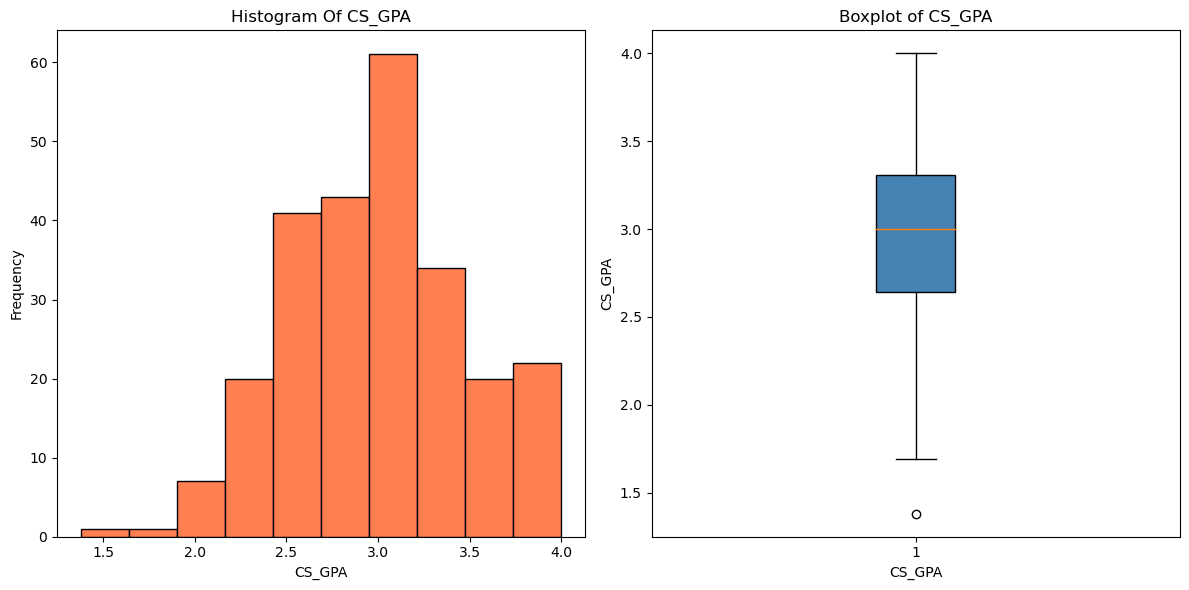

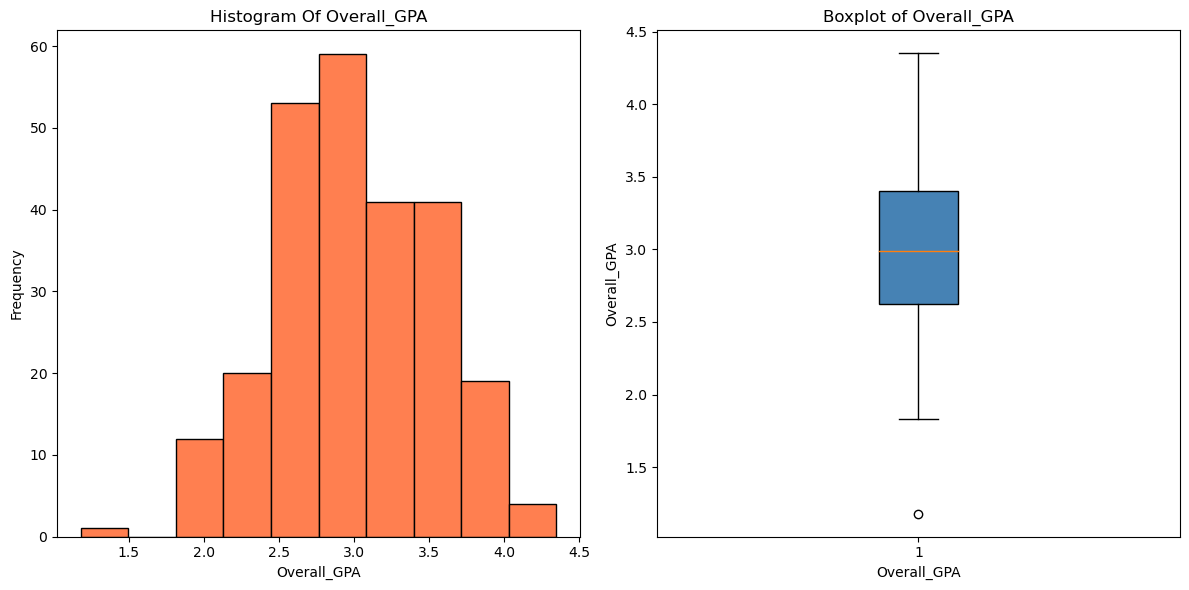

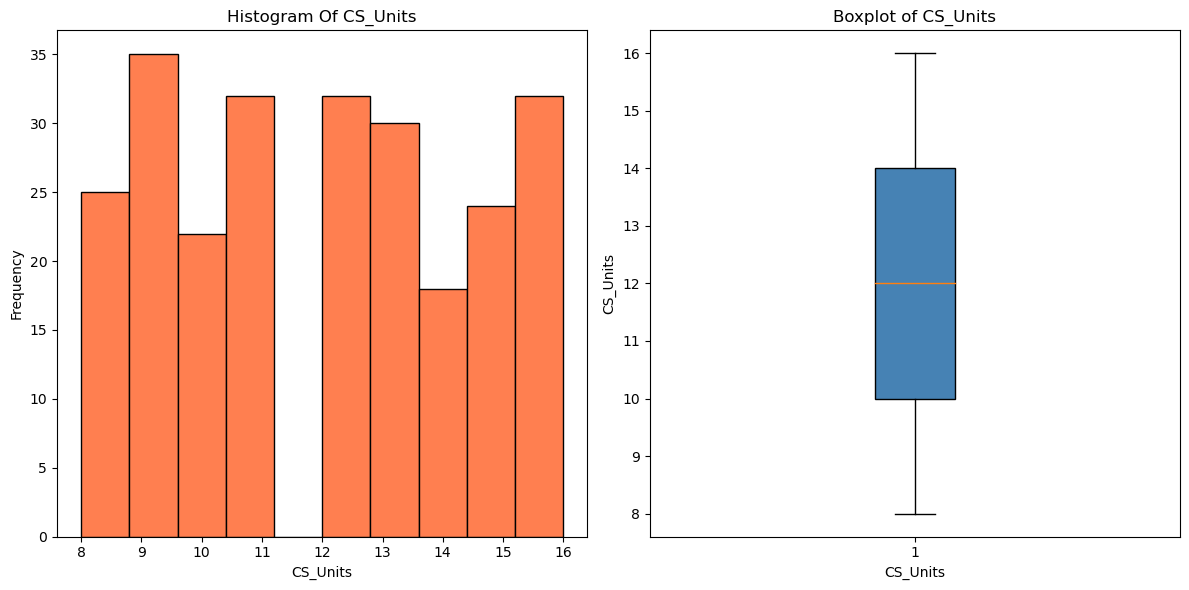

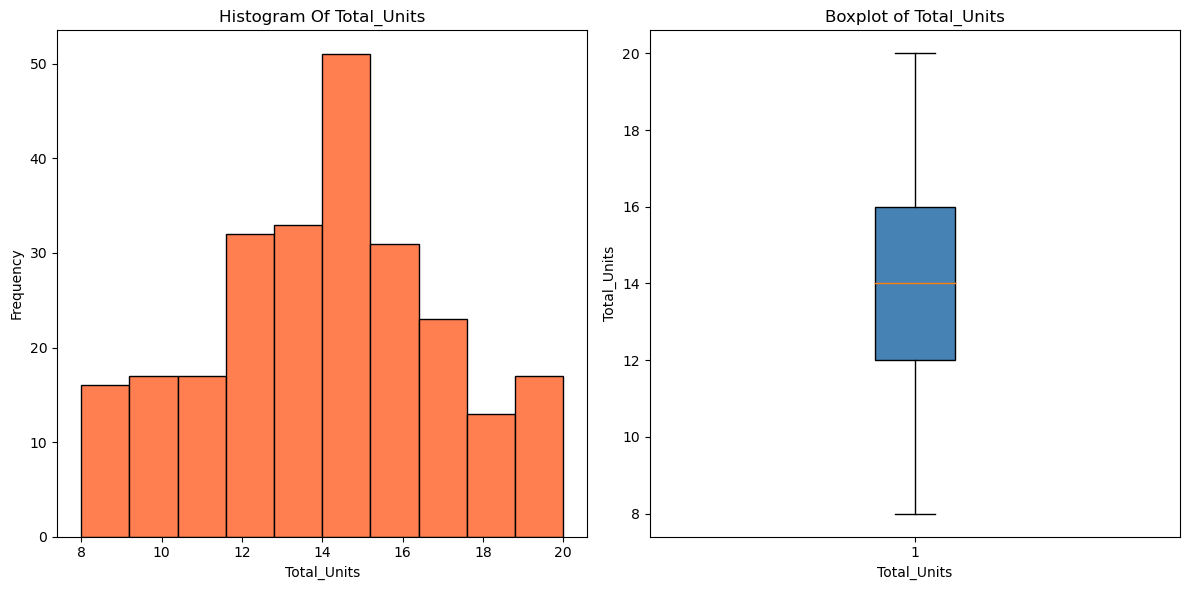

In [489]:
# Make univariate plots for the overall averages using previous function 
univariate_num(long_df,'CS_GPA')
univariate_num(long_df,'Overall_GPA')
univariate_num(long_df,'CS_Units')
univariate_num(long_df,'Total_Units')

In [490]:
# Group the data by each individual quarter and calculate GPA averages for each quarter 
order = ['FQ', 'WQ', 'SQ'] # need to have the quarters showing up in the right order 

avg_perquarter = long_df.groupby('Quarter_Label').agg({'CS_GPA': 'mean', 'Overall_GPA': 'mean'}).reset_index() # actual grouping 

avg_perquarter['Year'] = avg_perquarter['Quarter_Label'].apply(lambda x: int(x.split()[0]))
avg_perquarter['Quarter'] = avg_perquarter['Quarter_Label'].apply(lambda x: x.split()[1])
avg_perquarter['Quarter'] = pd.Categorical(avg_perquarter['Quarter'], categories=order, ordered=True)
avg_perquarter = avg_perquarter.sort_values(by=['Year', 'Quarter'])  # make the data categorical and sort by each year and each quarter in the order made above 

# Print the average CS GPA and the average overall GPA for each quarter 
for index, row in avg_perquarter.iterrows():
    print(f"Quarter: {row['Quarter_Label']}")
    print(f"Average CS GPA: {row['CS_GPA']:.2f}")
    print(f"Average Overall GPA: {row['Overall_GPA']:.2f} \n")
    

Quarter: 2021 FQ
Average CS GPA: 2.77
Average Overall GPA: 2.75 

Quarter: 2021 SQ
Average CS GPA: 2.90
Average Overall GPA: 2.96 

Quarter: 2022 FQ
Average CS GPA: 2.93
Average Overall GPA: 2.94 

Quarter: 2022 WQ
Average CS GPA: 2.88
Average Overall GPA: 2.82 

Quarter: 2022 SQ
Average CS GPA: 3.02
Average Overall GPA: 3.00 

Quarter: 2023 FQ
Average CS GPA: 2.97
Average Overall GPA: 2.90 

Quarter: 2023 WQ
Average CS GPA: 2.94
Average Overall GPA: 2.97 

Quarter: 2023 SQ
Average CS GPA: 3.02
Average Overall GPA: 3.04 

Quarter: 2024 FQ
Average CS GPA: 3.11
Average Overall GPA: 3.18 

Quarter: 2024 WQ
Average CS GPA: 3.10
Average Overall GPA: 3.08 

Quarter: 2024 SQ
Average CS GPA: 3.07
Average Overall GPA: 3.08 

Quarter: 2025 FQ
Average CS GPA: 2.73
Average Overall GPA: 2.71 

Quarter: 2025 WQ
Average CS GPA: 3.11
Average Overall GPA: 3.13 

Quarter: 2025 SQ
Average CS GPA: 2.87
Average Overall GPA: 2.93 



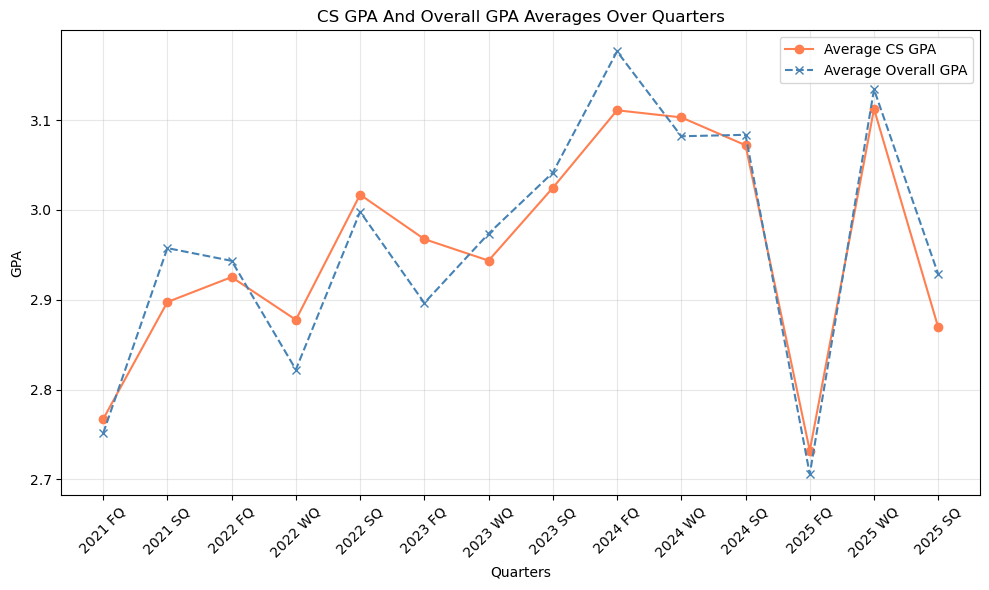

In [491]:
# Plot the above averages for each quarter over time 
plt.figure(figsize=(10, 6)) 

plt.plot(avg_perquarter['Quarter_Label'], avg_perquarter['CS_GPA'], label='Average CS GPA', marker='o', linestyle='-', color='coral') # plot CS GPA Averages 
plt.plot(avg_perquarter['Quarter_Label'], avg_perquarter['Overall_GPA'], label='Average Overall GPA', marker='x', linestyle='--', color='steelblue') # plot Overall GPA Averages 
plt.title('CS GPA And Overall GPA Averages Over Quarters')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show() 

# Graph Inferences: 
- Both the CS GPA and cumulative GPA do fluctuate a lot, but they both show similar trends with rises and falls, and both have an general upwards trend. 

- There is a sharp decline that happens in both GPAs during the Fall Quarter of 2025 which could be attributed to the limited amount of data points available for this particular quarter. 

In [492]:
# Calculate Linear Regression lines for CS GPA and Overall GPA so we can somewhat predict GPA trends for future quarters 

cs_X = np.arange(len(avg_perquarter['Quarter_Label'])).reshape(-1, 1)  
cs_Y = avg_perquarter['CS_GPA'].values.reshape(-1, 1)
cs_line = LinearRegression()
cs_line.fit(cs_X, cs_Y)

overall_X = np.arange(len(avg_perquarter['Quarter_Label'])).reshape(-1, 1)  
overall_Y = avg_perquarter['Overall_GPA'].values.reshape(-1, 1)
overall_line = LinearRegression()
overall_line.fit(overall_X, overall_Y)

LinearRegression()

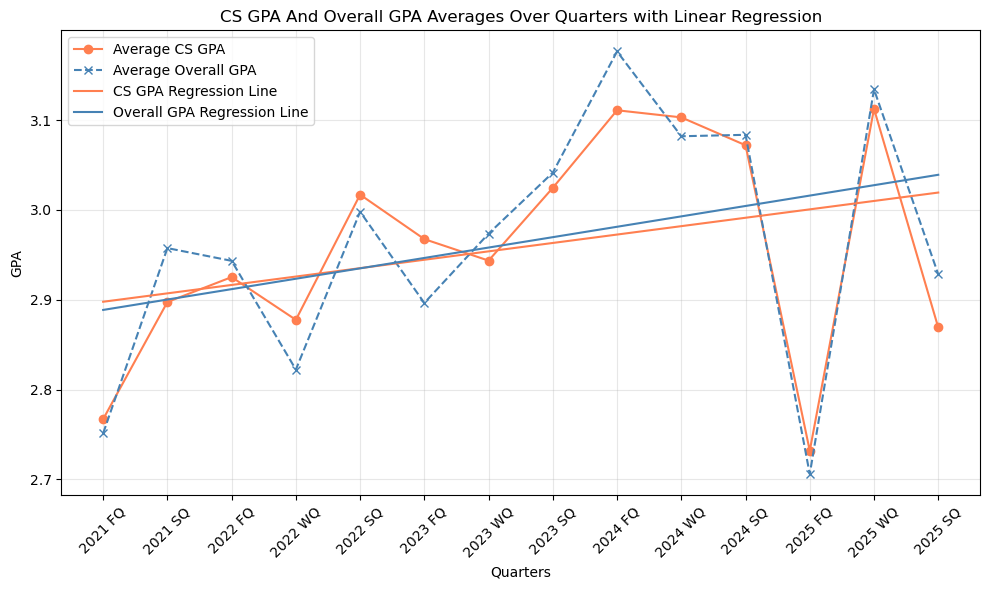

In [493]:
# Plot the new calculated Linear Regression lines on previous graphs 

plt.figure(figsize=(10, 6))

plt.plot(avg_perquarter['Quarter_Label'], avg_perquarter['CS_GPA'], label='Average CS GPA', marker='o', linestyle='-', color='coral')
plt.plot(avg_perquarter['Quarter_Label'], avg_perquarter['Overall_GPA'], label='Average Overall GPA', marker='x', linestyle='--', color='steelblue')
plt.plot(avg_perquarter['Quarter_Label'], cs_line.predict(cs_X), label='CS GPA Regression Line', color='coral') # CS GPA regression line 
plt.plot(avg_perquarter['Quarter_Label'], overall_line.predict(overall_X), label='Overall GPA Regression Line', color='steelblue') # Overall GPA regression line 
plt.title('CS GPA And Overall GPA Averages Over Quarters with Linear Regression')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graph Inferences 
- The overall GPA has a higher rate of increase than the CS GPA which shows that student performance has had a stronger improvement rate in non CS courses.

- Regression lines could be used to predict the GPAs for future quarters within some margin of error. 

- Important to note the reasons and underlying factors behind the fluctuations in the graph.

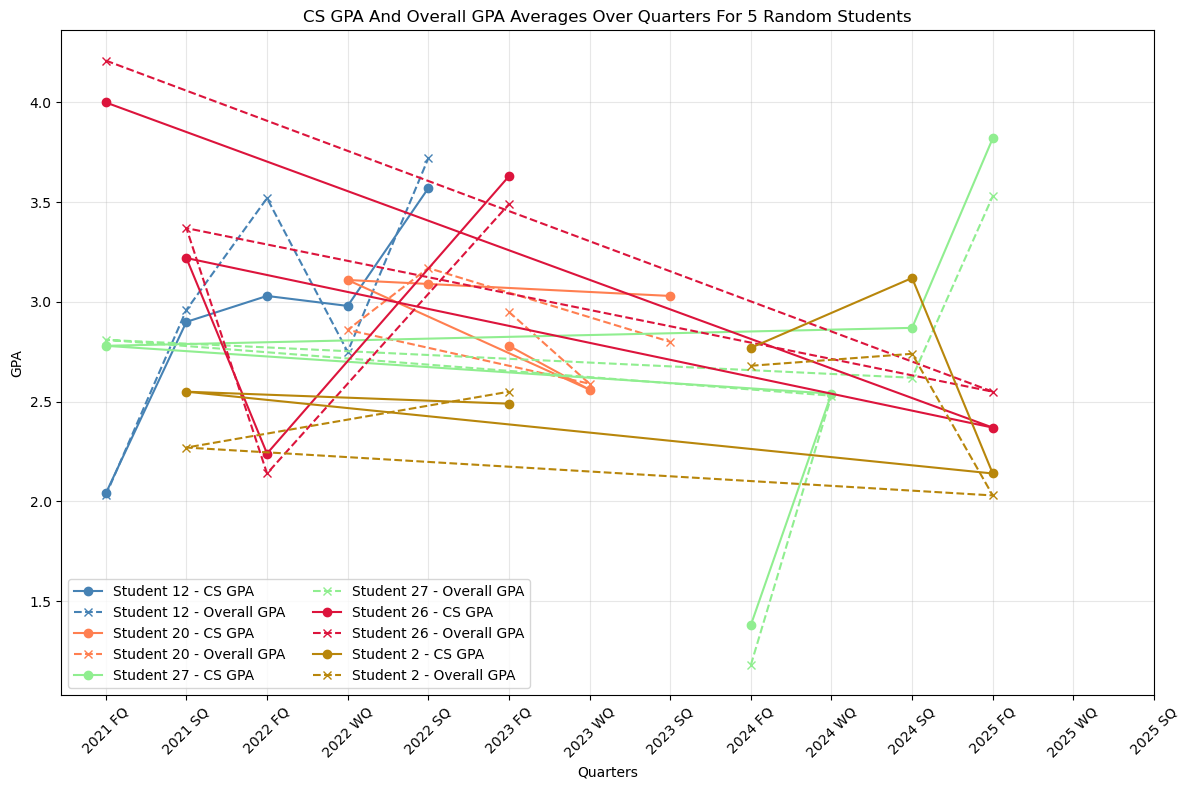

In [494]:
# I wanted to add a function where you would be able to track the GPA trends of individual students 
# 5 students from the dataset are randomly selected and their individual GPAs are tracked over the quarters 

order = ['FQ', 'WQ', 'SQ'] # need to have the quarters showing up in the right order 

long_df['Year'] = long_df['Quarter_Label'].apply(lambda x: int(x.split()[0]))
long_df['Quarter'] = long_df['Quarter_Label'].apply(lambda x: x.split()[1])
long_df['Quarter'] = pd.Categorical(long_df['Quarter'], categories=order, ordered=True)
long_df.sort_values(by=['Year', 'Quarter'], inplace=True) # same as above where you sort data by each year and each quarter in the correct order


rand_students = random.sample(list(student_ids), 5)  # select 5 random students 
student_ids = long_df['StudentID'].unique() 
chron_labels = long_df['Quarter_Label'].unique()

plt.figure(figsize=(12, 8))

colors = ['steelblue', 'coral', 'lightgreen', 'crimson', 'darkgoldenrod']
for i, student_id in enumerate(rand_students):
    stu_data = long_df[long_df['StudentID'] == student_id]
    color = colors[i] 
    plt.plot(stu_data['Quarter_Label'], stu_data['CS_GPA'], label=f'Student {student_id} - CS GPA', marker='o', color=color, linestyle='-') # Plot CS GPA for individual student 
    plt.plot(stu_data['Quarter_Label'], stu_data['Overall_GPA'], label=f'Student {student_id} - Overall GPA', marker='x', color=color, linestyle='--')  # Plot Overall GPA for individual student 

plt.title('CS GPA And Overall GPA Averages Over Quarters For 5 Random Students')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.xticks(range(len(chron_labels)), chron_labels, rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(ncol=2)

plt.tight_layout()
plt.show()

# Why This Graph? 
sdfgsdfghjkdfgkhjkl

In [495]:
# Calculate the correlation between the GPA of the students and the respective amount of units taken by the students for CS and Overall
cs_corr = long_df[['CS_Units', 'CS_GPA']].corr().iloc[0, 1]  
print(f"Correlation between CS Units and CS GPA: {cs_corr:.2f}")

overall_corr = long_df[['Total_Units', 'Overall_GPA']].corr().iloc[0, 1]
print(f"Correlation between Total Units and Overall GPA: {overall_corr:.2f}")

Correlation between CS Units and CS GPA: -0.05
Correlation between Total Units and Overall GPA: -0.08


In [496]:
# Calculate Linear Regression lines for CS GPA and Overall GPA in terms of their correlation to CS Units Taken and Overall Units Taken
cs_X = long_df[['CS_Units']].values.reshape(-1, 1) 
cs_Y = long_df['CS_GPA'].values 
cs_corr_line = LinearRegression()
cs_corr_line.fit(cs_X, cs_Y)

overall_X = long_df[['Total_Units']].values.reshape(-1, 1)  
overall_Y = long_df['Overall_GPA'].values 
overall_corr_line = LinearRegression()
overall_corr_line.fit(overall_X, overall_Y)

LinearRegression()

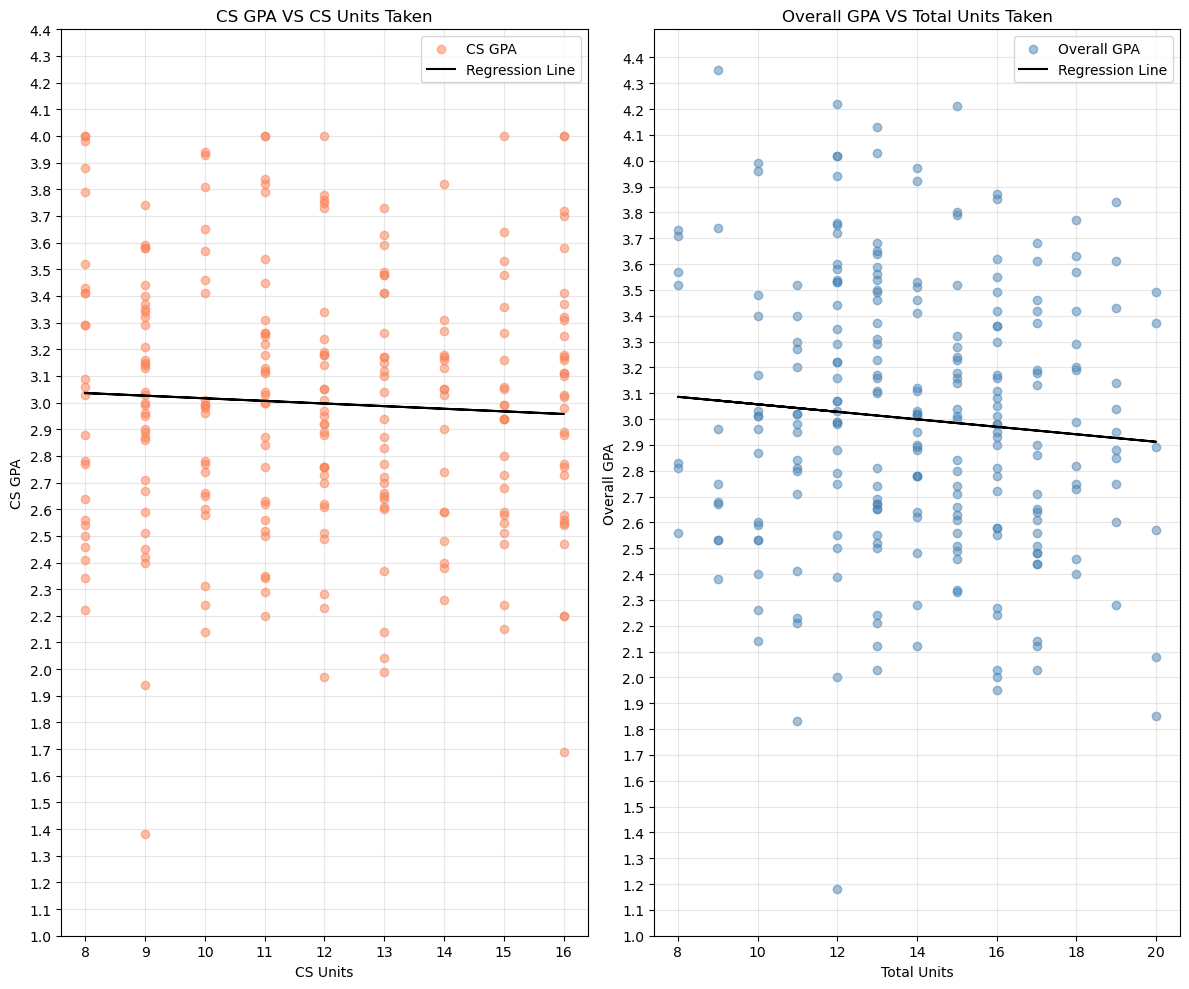

In [497]:
# Plot the graphs for Units Taken comparitive to GPA and add the new calculated Linear Regression lines

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.scatter(long_df['CS_Units'], long_df['CS_GPA'], color='coral', alpha=0.5, label='CS GPA') # scatterplot of CS GPA vs CS Units Taken
plt.plot(long_df['CS_Units'], cs_corr_line.predict(cs_X), color='black', label='Regression Line') # regression line calculated for said scatterplot
plt.title('CS GPA VS CS Units Taken')
plt.xlabel('CS Units')
plt.ylabel('CS GPA')
plt.yticks(np.arange(1.0, 4.5, 0.1))
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(long_df['Total_Units'], long_df['Overall_GPA'], color='steelblue', alpha=0.5, label='Overall GPA') # scatterplot of Overall GPA vs Overall Units Taken
plt.plot(long_df['Total_Units'], overall_corr_line.predict(overall_X), color='black', label='Regression Line') # regression line calculated for said scatterplot
plt.title('Overall GPA VS Total Units Taken')
plt.xlabel('Total Units')
plt.ylabel('Overall GPA')
plt.yticks(np.arange(1.0, 4.5, 0.1))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graph Inferences 
- There is a very slight negative correlation between GPA and the amount of units taken for both graphs.

- There seems to be a higher rate of decrease when comparing the total units taken and the overall GPA rather than when comparing the CS specific GPA and units.

- However both plots indicate very low long term correlation which suggests that enrolled units do not strongly affect GPA.

In [498]:
# This function helps plots CS GPA and Overall GPA characteristics by the 3 quarters by labeling the dataset
def quarter_labels(timestamp):
    year = timestamp // 100 # seperate and group the data into either fall, winter, or spring quarters based on timestamps  
    month = timestamp % 100
    if month == 1:
        return 'Winter'
    elif month == 3:
        return 'Spring'
    elif month == 8:
        return 'Fall'
    else:
        return 'Unknown'

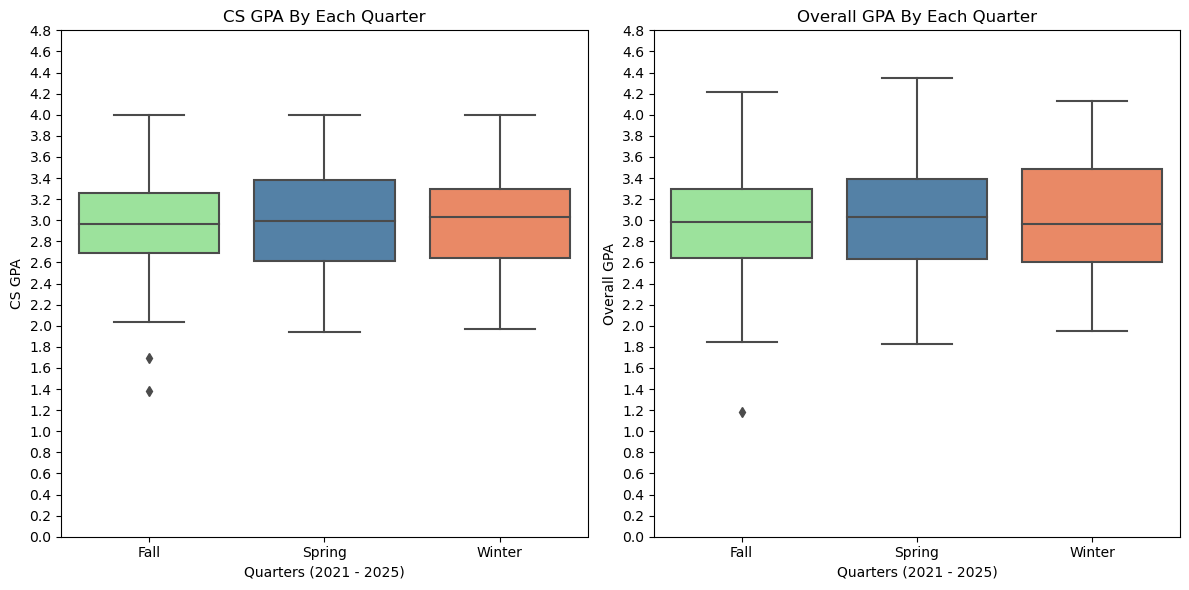

In [499]:
# Plot the data for CS GPA and Overall GPA for each individual type of quarter using boxplots 
long_df['Quarter'] = long_df['Timestamp'].apply(quarter_labels) # get the quarter labels for the dataset
custom = {'Winter': 'coral', 'Spring': 'steelblue', 'Fall': 'lightgreen'}

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Quarter', y='CS_GPA', data=long_df, palette=custom)
plt.title('CS GPA By Each Quarter')
plt.xlabel('Quarters (2021 - 2025)')
plt.ylabel('CS GPA')
plt.yticks(np.arange(0, 5.0, 0.2))

plt.subplot(1, 2, 2)
sns.boxplot(x='Quarter', y='Overall_GPA', data=long_df, palette=custom)
plt.title('Overall GPA By Each Quarter')
plt.xlabel('Quarters (2021 - 2025)')
plt.ylabel('Overall GPA')
plt.yticks(np.arange(0, 5.0, 0.2))

plt.tight_layout()
plt.show()

# Graph Inferences 
- Both the CS GPA and Overall GPA show a similar spread across all quarters.

- The distributions in both plots show a few outliers in the Fall quarter which shows student performance is more varied during Fall quarter than the other two quarters. 

- There is no significant difference between the CS GPA and Overall GPA medians for each specific quarter. 

In [500]:
# Group the data by each type of quarter and calculate GPA averages for each quarter 
avg_byquarter = long_df.groupby('Quarter').agg({'CS_GPA': 'mean', 'Overall_GPA': 'mean'}).reset_index() 

for index, row in avg_byquarter.iterrows():
    print(f"Quarter: {row['Quarter']}")
    print(f"Average CS GPA: {row['CS_GPA']:.2f}")
    print(f"Average Overall GPA: {row['Overall_GPA']:.2f} \n")

Quarter: Fall
Average CS GPA: 2.96
Average Overall GPA: 2.96 

Quarter: Spring
Average CS GPA: 3.01
Average Overall GPA: 3.02 

Quarter: Winter
Average CS GPA: 3.02
Average Overall GPA: 3.01 



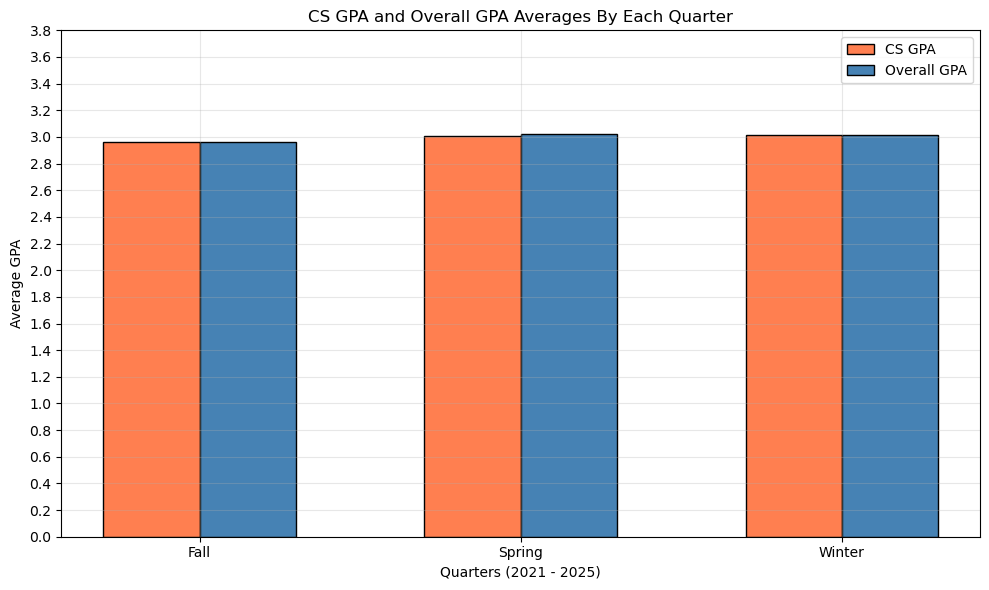

In [501]:
# Plot the averages CS GPA and Overall GPA for each individual type of quarter using bar graphs 
x = np.arange(len(avg_byquarter['Quarter']))  # spacing out for the quarters for graphing purposes 
bar_width = 0.30

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width/2, avg_byquarter['CS_GPA'], width=bar_width, color='coral', edgecolor='black', label='CS GPA')
plt.bar(x + bar_width/2, avg_byquarter['Overall_GPA'], width=bar_width, color='steelblue', edgecolor='black', label='Overall GPA')
plt.title('CS GPA and Overall GPA Averages By Each Quarter')
plt.xlabel('Quarters (2021 - 2025)')
plt.ylabel('Average GPA')
plt.xticks(x, avg_byquarter['Quarter'])
plt.yticks(np.arange(0, 4.0, 0.2))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graph Inferences 
- There is no obvious variation in student performance for CS specific subjects and non CS courses. 

- There is no significant deviation in GPAs between the specific quarters.

In [502]:
# Group the data by each year and calculate GPA averages for each year  
long_df['Year'] = long_df['Quarter_Label'].str.split().str[0]
avg_byyear = long_df.groupby('Year').agg({'CS_GPA': 'mean', 'Overall_GPA': 'mean'}).reset_index()

for index, row in avg_byyear.iterrows():
    print(f"Year: {row['Year']}")
    print(f"Average CS GPA: {row['CS_GPA']:.2f}")
    print(f"Average Overall GPA: {row['Overall_GPA']:.2f}")
    print()

Year: 2021
Average CS GPA: 2.81
Average Overall GPA: 2.83

Year: 2022
Average CS GPA: 2.95
Average Overall GPA: 2.93

Year: 2023
Average CS GPA: 2.98
Average Overall GPA: 2.97

Year: 2024
Average CS GPA: 3.10
Average Overall GPA: 3.11

Year: 2025
Average CS GPA: 2.95
Average Overall GPA: 2.98



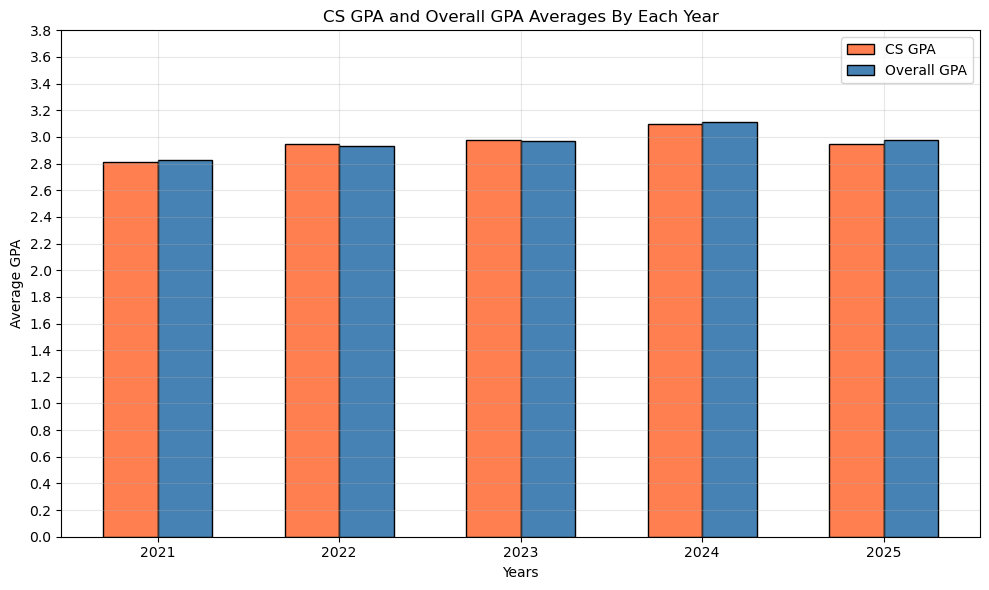

In [503]:
# Plot the averages CS GPA and Overall GPA for each individual type of quarter using bar graphs 
x = np.arange(len(avg_byyear['Year']))  # Positions for the quarters
bar_width = 0.30

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width/2, avg_byyear['CS_GPA'], width=bar_width, color='coral', edgecolor='black', label='CS GPA')
plt.bar(x + bar_width/2, avg_byyear['Overall_GPA'], width=bar_width, color='steelblue', edgecolor='black', label='Overall GPA')
plt.title('CS GPA and Overall GPA Averages By Each Year')
plt.xlabel('Years')
plt.ylabel('Average GPA')
plt.xticks(x, avg_byyear['Year'])
plt.yticks(np.arange(0, 4.0, 0.2))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Graph Inferences 
- There is no significant variation between the average overall GPA and the average CS GPA for each year. 

- There is a gradual increase in both the CSA GPA and overall GPA until 2024 and then a slight decline in both from 2024 to 2025.